In [27]:
%load_ext autoreload
%autoreload 2
%cd ..

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö


In [28]:
from scripts import Slopes
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt

import scripts.utils as utils

utils.reset_seeds()

In [29]:
from keras.callbacks import Callback
class custom_callback(Callback):
    def __init__(self, logpath=""):
        self.logpath = logpath

    def on_epoch_end(self, epoch, logs=[dict, None]):
        if(int(epoch) % 100) == 0:
            if 'val_loss' in logs:
                print("Epoch: {:>3} | Loss: ".format(epoch) + f"{logs['loss']:.5e}" + " | Valid loss: " + f"{logs['val_loss']:.5e}")
            else:
                print("Epoch: {:>3} | Loss: ".format(epoch) + f"{logs['loss']:.5e}")

### Leiame mis on piisavalt hea test error millega rahule jääda

In [31]:
tf.random.set_seed(0)

model = keras.Sequential([
        layers.Input(shape=(1,)),
        layers.Dense(units=5, activation='relu'),
        layers.Dense(units=5, activation='relu'),
        layers.Dense(units=1, activation='linear'),
    ])

X = np.linspace(-1, 1, 1000)
y = X**2
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01, amsgrad=True, epsilon=0.01),
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=4000 , verbose=0,
              #validation_data=(X_valid, y_valid),
              callbacks=[custom_callback("tsau")])

Epoch:   0 | Loss: 6.77456e-02
Epoch: 100 | Loss: 1.03189e-04
Epoch: 200 | Loss: 9.87183e-05
Epoch: 300 | Loss: 6.62620e-05
Epoch: 400 | Loss: 4.25304e-05
Epoch: 500 | Loss: 3.98542e-05
Epoch: 600 | Loss: 3.23117e-05
Epoch: 700 | Loss: 2.80253e-05
Epoch: 800 | Loss: 4.71085e-05
Epoch: 900 | Loss: 3.39610e-05
Epoch: 1000 | Loss: 2.95723e-05
Epoch: 1100 | Loss: 4.00989e-05
Epoch: 1200 | Loss: 3.67591e-05
Epoch: 1300 | Loss: 3.47756e-05
Epoch: 1400 | Loss: 2.89179e-05
Epoch: 1500 | Loss: 3.93509e-05
Epoch: 1600 | Loss: 3.28369e-05
Epoch: 1700 | Loss: 4.28969e-05
Epoch: 1800 | Loss: 2.94793e-05
Epoch: 1900 | Loss: 4.45350e-05
Epoch: 2000 | Loss: 3.61308e-05
Epoch: 2100 | Loss: 2.98939e-05
Epoch: 2200 | Loss: 3.00680e-05
Epoch: 2300 | Loss: 3.58371e-05
Epoch: 2400 | Loss: 3.09883e-05
Epoch: 2500 | Loss: 3.04319e-05
Epoch: 2600 | Loss: 2.89428e-05
Epoch: 2700 | Loss: 3.16408e-05
Epoch: 2800 | Loss: 3.48871e-05
Epoch: 2900 | Loss: 2.74492e-05
Epoch: 3000 | Loss: 3.23364e-05
Epoch: 3100 | Loss

In [48]:
Slopes.breakpoint_finder(model, np.linspace(-1, 1, 10000),np.linspace(-1, 1, 10000)**2)

313/313 [==============================] - 0s 1ms/step


[((-0.9997999799979999, 0.9901365), array([2, 4, 5, 8], dtype=int64)),
 ((-0.9985998599859987, 0.9882842), array([2, 4, 5, 7, 8], dtype=int64)),
 ((-0.7345734573457345, 0.5299155), array([2, 4, 5, 7], dtype=int64)),
 ((-0.4711471147114711, 0.21169683), array([4, 5, 7], dtype=int64)),
 ((-0.2139213921392139, 0.03619729), array([4, 7], dtype=int64)),
 ((0.027502750275027577, -0.008874074), array([3, 4, 7], dtype=int64)),
 ((0.2695269526952695, 0.06460966), array([3, 4, 5, 7], dtype=int64)),
 ((0.5195519551955197, 0.2640895), array([0, 3, 4, 5, 7], dtype=int64)),
 ((0.75997599759976, 0.5724241), array([0, 3, 4, 5, 7, 9], dtype=int64))]

In [32]:
model.evaluate(X, y, verbose=0)

[2.951110764115583e-05, 2.951110764115583e-05]

Error millega võime rahule jääda on siis: *8.529616025043651e-05* (**0.000085**)


sest see on see mida mudel saavutab kui on 1000 andmepunkti.

In [33]:
def treeni_mudel(X, y, epochs=2000, fix_seed=True):
    if fix_seed:
        tf.random.set_seed(0)

    model = keras.Sequential([
            layers.Input(shape=(1,)),
            layers.Dense(units=5, activation='relu'),
            layers.Dense(units=5, activation='relu'),
            layers.Dense(units=1, activation='linear'),
        ])

    X_train, y_train = X, y
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.01, amsgrad=True, epsilon=0.01),
        # Loss function to minimize
        loss=keras.losses.MeanSquaredError(),
        # List of metrics to monitor
        metrics=[keras.metrics.MeanSquaredError()],
    )

    h = model.fit(X, y, batch_size=8, epochs=epochs, verbose=0,
                #validation_data=(X_valid, y_valid),
                callbacks=[custom_callback("tsau")])
    return model, h

In [34]:
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

## trainset = 40

Epoch:   0 | Loss: 4.74503e-01
Epoch: 100 | Loss: 9.82196e-02
Epoch: 200 | Loss: 9.81837e-02
Epoch: 300 | Loss: 9.86570e-02
Epoch: 400 | Loss: 9.82997e-02
Epoch: 500 | Loss: 9.81869e-02
Epoch: 600 | Loss: 9.81748e-02
Epoch: 700 | Loss: 9.80885e-02
Epoch: 800 | Loss: 9.81781e-02
Epoch: 900 | Loss: 9.81280e-02
Epoch: 1000 | Loss: 9.80922e-02
Epoch: 1100 | Loss: 9.81337e-02
Epoch: 1200 | Loss: 9.81305e-02
Epoch: 1300 | Loss: 9.81332e-02
Epoch: 1400 | Loss: 9.83882e-02
Epoch: 1500 | Loss: 9.83766e-02
Epoch: 1600 | Loss: 9.81379e-02
Epoch: 1700 | Loss: 9.82929e-02
Epoch: 1800 | Loss: 9.87782e-02
Epoch: 1900 | Loss: 9.82273e-02
Epoch: 2000 | Loss: 9.82025e-02
Epoch: 2100 | Loss: 9.84172e-02
Epoch: 2200 | Loss: 9.81490e-02
Epoch: 2300 | Loss: 9.81732e-02
Epoch: 2400 | Loss: 9.84235e-02
Epoch: 2500 | Loss: 9.82027e-02
Epoch: 2600 | Loss: 9.84313e-02
Epoch: 2700 | Loss: 9.83620e-02
Epoch: 2800 | Loss: 9.80979e-02
Epoch: 2900 | Loss: 9.83172e-02
Epoch: 3000 | Loss: 9.81692e-02
Epoch: 3100 | Loss

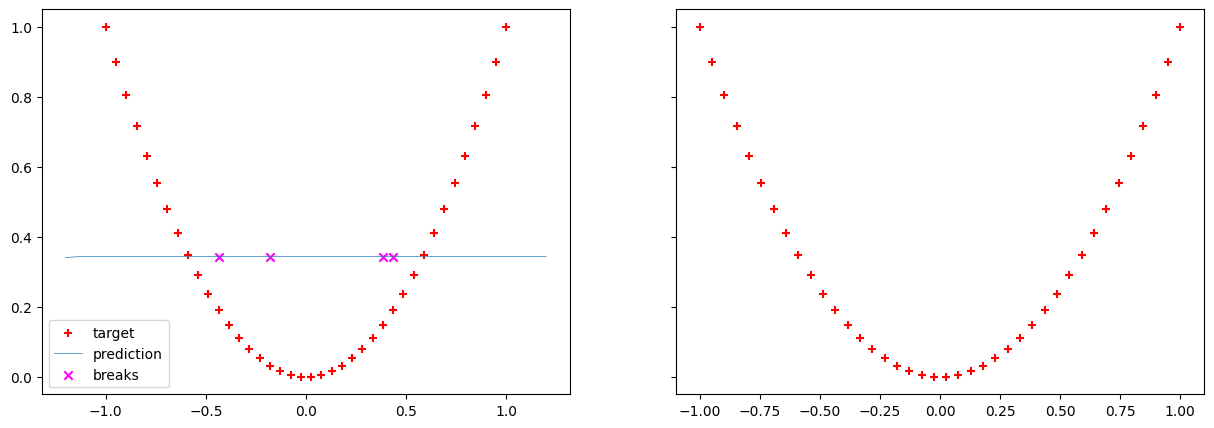

313/313 [==============================] - 1s 1ms/step - loss: 0.0890 - mean_squared_error: 0.0890


[0.08902730792760849, 0.08902730792760849]

In [36]:
X = np.linspace(-1, 1, 40)
y = X**2
model40, h40 = treeni_mudel(X, y, epochs=4000)

utils.joonista(model40, X, y)
model40.evaluate(X_valid, y_valid)

## trainset = 20

Epoch:   0 | Loss: 5.57199e-01
Epoch: 100 | Loss: 5.68434e-03
Epoch: 200 | Loss: 1.09785e-03
Epoch: 300 | Loss: 4.92052e-04
Epoch: 400 | Loss: 4.26073e-04
Epoch: 500 | Loss: 3.36791e-04
Epoch: 600 | Loss: 3.16020e-04
Epoch: 700 | Loss: 3.56668e-04
Epoch: 800 | Loss: 3.90240e-04
Epoch: 900 | Loss: 2.22594e-04
Epoch: 1000 | Loss: 1.82359e-04
Epoch: 1100 | Loss: 1.85156e-04
Epoch: 1200 | Loss: 2.05229e-04
Epoch: 1300 | Loss: 1.66565e-04
Epoch: 1400 | Loss: 1.68628e-04
Epoch: 1500 | Loss: 2.07914e-04
Epoch: 1600 | Loss: 1.70980e-04
Epoch: 1700 | Loss: 1.73348e-04
Epoch: 1800 | Loss: 1.68659e-04
Epoch: 1900 | Loss: 1.67241e-04
Epoch: 2000 | Loss: 1.61540e-04
Epoch: 2100 | Loss: 1.68599e-04
Epoch: 2200 | Loss: 1.67570e-04
Epoch: 2300 | Loss: 1.85179e-04
Epoch: 2400 | Loss: 1.75445e-04
Epoch: 2500 | Loss: 1.81995e-04
Epoch: 2600 | Loss: 1.73850e-04
Epoch: 2700 | Loss: 1.73608e-04
Epoch: 2800 | Loss: 1.59605e-04
Epoch: 2900 | Loss: 1.58384e-04
Epoch: 3000 | Loss: 1.74798e-04
Epoch: 3100 | Loss

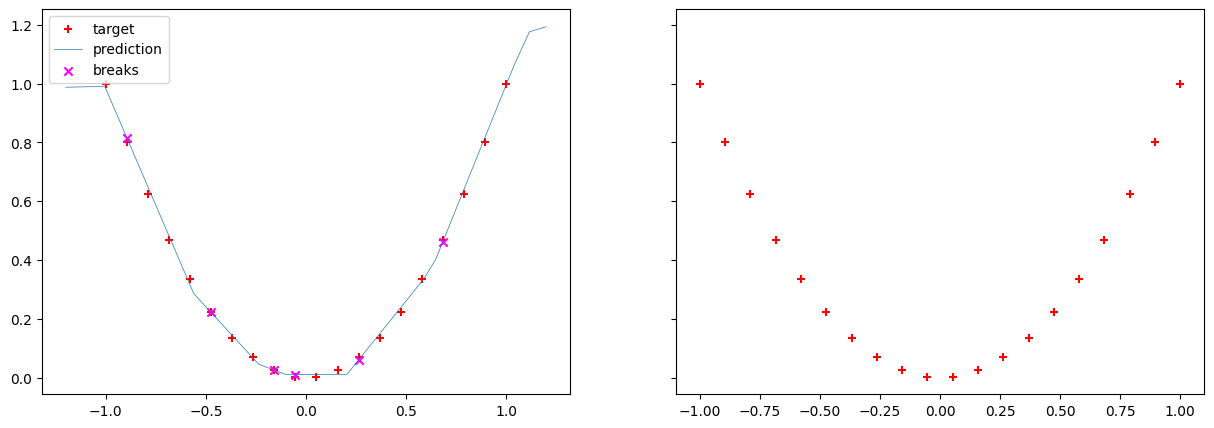

313/313 [==============================] - 1s 1ms/step - loss: 1.7328e-04 - mean_squared_error: 1.7328e-04


[0.00017327976820524782, 0.00017327976820524782]

In [37]:
X = np.linspace(-1, 1, 20)
y = X**2
model20, h20 = treeni_mudel(X, y, epochs=6000)

utils.joonista(model20, X, y)
model20.evaluate(X_valid, y_valid)

## trainset = 10

Epoch:   0 | Loss: 2.53670e-01
Epoch: 100 | Loss: 3.81388e-03
Epoch: 200 | Loss: 1.45529e-03
Epoch: 300 | Loss: 1.43091e-03
Epoch: 400 | Loss: 1.43117e-03
Epoch: 500 | Loss: 1.29507e-03
Epoch: 600 | Loss: 1.26744e-03
Epoch: 700 | Loss: 1.16453e-03
Epoch: 800 | Loss: 1.08301e-03
Epoch: 900 | Loss: 1.23778e-03
Epoch: 1000 | Loss: 1.41877e-03
Epoch: 1100 | Loss: 1.07694e-03
Epoch: 1200 | Loss: 1.17005e-03
Epoch: 1300 | Loss: 1.04894e-03
Epoch: 1400 | Loss: 1.12234e-03
Epoch: 1500 | Loss: 1.09897e-03
Epoch: 1600 | Loss: 1.02709e-03
Epoch: 1700 | Loss: 1.02722e-03
Epoch: 1800 | Loss: 1.13573e-03
Epoch: 1900 | Loss: 1.05769e-03
Epoch: 2000 | Loss: 1.11328e-03
Epoch: 2100 | Loss: 1.01607e-03
Epoch: 2200 | Loss: 1.02455e-03
Epoch: 2300 | Loss: 1.07311e-03
Epoch: 2400 | Loss: 1.23723e-03
Epoch: 2500 | Loss: 1.02092e-03
Epoch: 2600 | Loss: 1.09923e-03
Epoch: 2700 | Loss: 1.17238e-03
Epoch: 2800 | Loss: 1.13913e-03
Epoch: 2900 | Loss: 1.06255e-03
Epoch: 3000 | Loss: 1.12425e-03
Epoch: 3100 | Loss

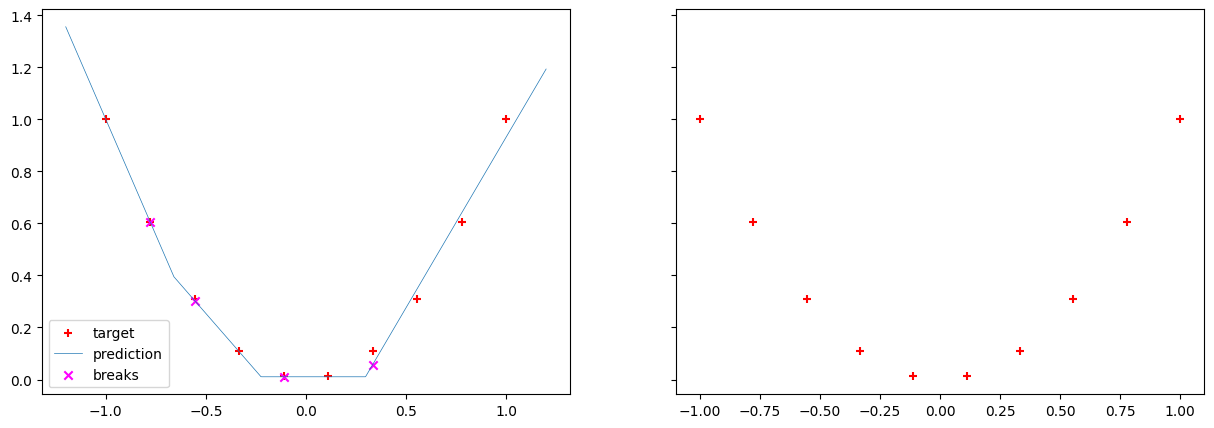

313/313 [==============================] - 0s 1ms/step - loss: 7.8756e-04 - mean_squared_error: 7.8756e-04


[0.0007875578594394028, 0.0007875578594394028]

In [38]:
X = np.linspace(-1, 1, 10)
y = X**2
model10, h10 = treeni_mudel(X, y, epochs=8000)

utils.joonista(model10, X, y)
model10.evaluate(X_valid, y_valid)

1/1 [==============================] - 0s 62ms/step
model contains 4 breaks
32/32 [==============================] - 0s 984us/step


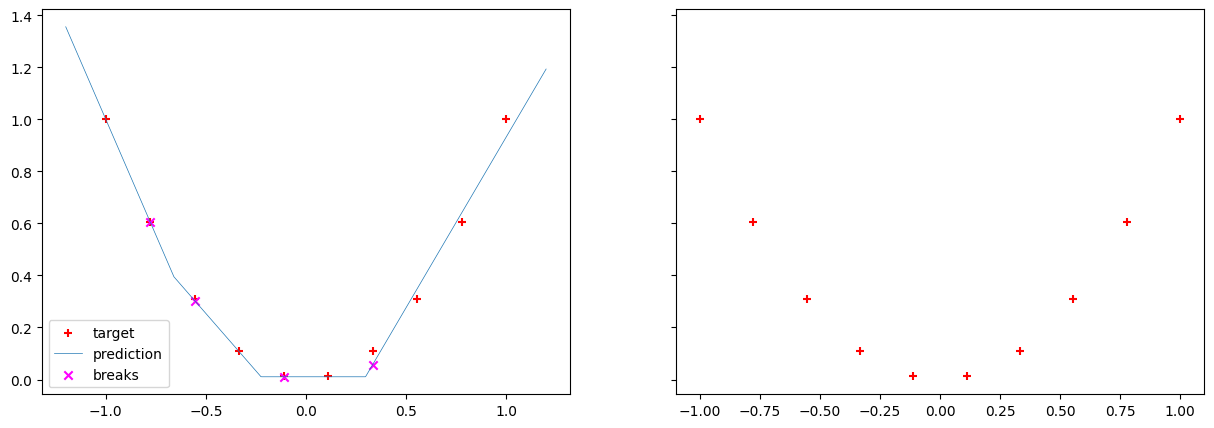

In [39]:
X = np.linspace(-1, 1, 10)
y = X**2
utils.joonista(model10, X, y, max_delta=0.01)

Epoch:   0 | Loss: 4.06836e-01
Epoch: 100 | Loss: 1.05714e-02
Epoch: 200 | Loss: 5.92162e-04
Epoch: 300 | Loss: 6.65760e-06
Epoch: 400 | Loss: 1.72194e-08
Epoch: 500 | Loss: 1.21769e-11
Epoch: 600 | Loss: 1.36069e-13
Epoch: 700 | Loss: 3.80251e-14
Epoch: 800 | Loss: 2.84328e-14
Epoch: 900 | Loss: 1.34226e-14
Epoch: 1000 | Loss: 1.12910e-14
Epoch: 1100 | Loss: 1.12910e-14
Epoch: 1200 | Loss: 1.12910e-14
Epoch: 1300 | Loss: 1.12910e-14
Epoch: 1400 | Loss: 1.12910e-14
Epoch: 1500 | Loss: 1.12910e-14
Epoch: 1600 | Loss: 1.12910e-14
Epoch: 1700 | Loss: 1.12910e-14
Epoch: 1800 | Loss: 1.12910e-14
Epoch: 1900 | Loss: 1.12910e-14
Epoch: 2000 | Loss: 1.12910e-14
Epoch: 2100 | Loss: 1.12910e-14
Epoch: 2200 | Loss: 1.12910e-14
Epoch: 2300 | Loss: 1.12910e-14
Epoch: 2400 | Loss: 1.12910e-14
Epoch: 2500 | Loss: 1.12910e-14
Epoch: 2600 | Loss: 1.12910e-14
Epoch: 2700 | Loss: 1.12910e-14
Epoch: 2800 | Loss: 1.12910e-14
Epoch: 2900 | Loss: 1.12910e-14
Epoch: 3000 | Loss: 1.12910e-14
Epoch: 3100 | Loss

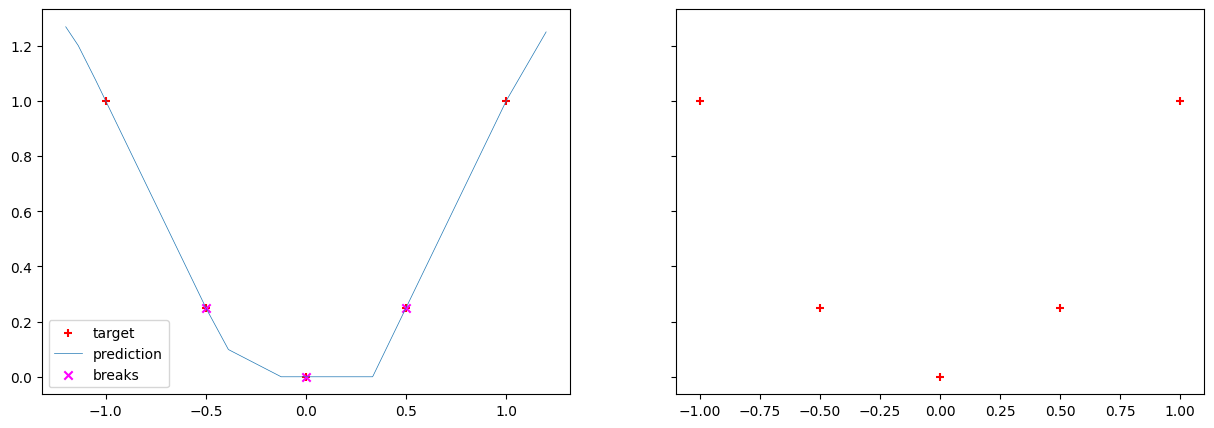

313/313 [==============================] - 0s 1ms/step - loss: 0.0019 - mean_squared_error: 0.0019


[0.0018809738103300333, 0.0018809738103300333]

In [40]:
X = np.linspace(-1, 1, 5)
y = X**2
model5, h5 = treeni_mudel(X, y, epochs=8000)

utils.joonista(model5, X, y)
model5.evaluate(X_valid, y_valid)

## noisy data @0.05 scale

Epoch:   0 | Loss: 3.12950e-01
Epoch: 100 | Loss: 7.27974e-02
Epoch: 200 | Loss: 7.28670e-02
Epoch: 300 | Loss: 7.30748e-02
Epoch: 400 | Loss: 7.30555e-02
Epoch: 500 | Loss: 7.28227e-02
Epoch: 600 | Loss: 7.30650e-02
Epoch: 700 | Loss: 7.30057e-02
Epoch: 800 | Loss: 7.28303e-02
Epoch: 900 | Loss: 7.29187e-02
Epoch: 1000 | Loss: 7.27704e-02
Epoch: 1100 | Loss: 7.28192e-02
Epoch: 1200 | Loss: 7.27901e-02
Epoch: 1300 | Loss: 7.28338e-02
Epoch: 1400 | Loss: 7.29015e-02
Epoch: 1500 | Loss: 7.30390e-02
Epoch: 1600 | Loss: 7.28235e-02
Epoch: 1700 | Loss: 7.27749e-02
Epoch: 1800 | Loss: 7.32221e-02
Epoch: 1900 | Loss: 7.30107e-02
Epoch: 2000 | Loss: 7.28739e-02
Epoch: 2100 | Loss: 7.29931e-02
Epoch: 2200 | Loss: 7.30156e-02
Epoch: 2300 | Loss: 7.28562e-02
Epoch: 2400 | Loss: 7.29448e-02
Epoch: 2500 | Loss: 7.28929e-02
Epoch: 2600 | Loss: 7.32140e-02
Epoch: 2700 | Loss: 7.28479e-02
Epoch: 2800 | Loss: 7.28170e-02
Epoch: 2900 | Loss: 7.29691e-02
Epoch: 3000 | Loss: 7.28664e-02
Epoch: 3100 | Loss

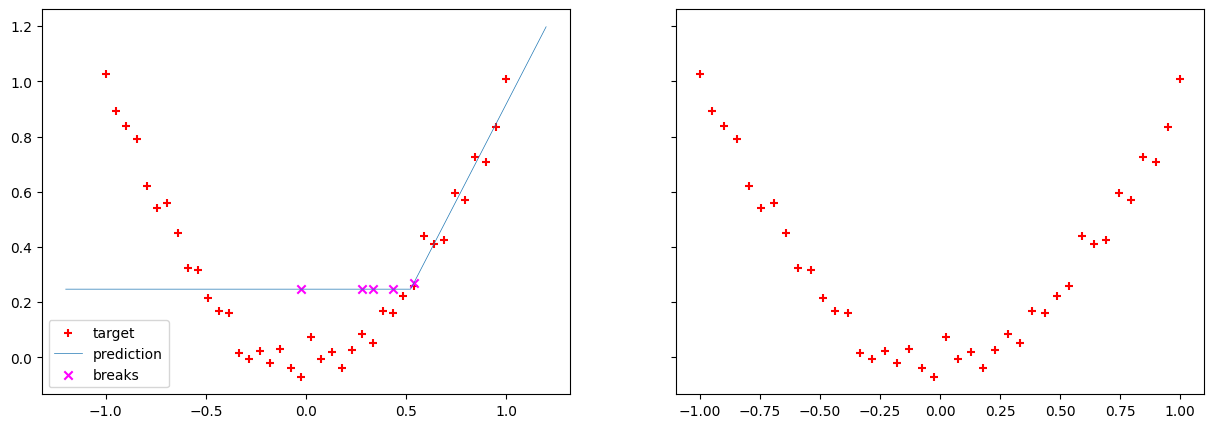

313/313 [==============================] - 0s 1ms/step - loss: 0.0565 - mean_squared_error: 0.0565


[0.05648110434412956, 0.05648110434412956]

In [41]:
X = np.linspace(-1, 1, 40)
y = X**2 + np.random.normal(0, 0.05, 40)
model40n, h40n = treeni_mudel(X, y, epochs=6000)

utils.joonista(model40n, X, y)
model40n.evaluate(X_valid, y_valid)

Epoch:   0 | Loss: 3.15559e-01
Epoch: 100 | Loss: 4.69828e-03
Epoch: 200 | Loss: 2.36602e-03
Epoch: 300 | Loss: 2.03092e-03
Epoch: 400 | Loss: 1.93988e-03
Epoch: 500 | Loss: 1.83739e-03
Epoch: 600 | Loss: 1.76074e-03
Epoch: 700 | Loss: 1.77782e-03
Epoch: 800 | Loss: 1.65870e-03
Epoch: 900 | Loss: 1.63981e-03
Epoch: 1000 | Loss: 1.51479e-03
Epoch: 1100 | Loss: 1.49658e-03
Epoch: 1200 | Loss: 1.44112e-03
Epoch: 1300 | Loss: 1.40551e-03
Epoch: 1400 | Loss: 1.38956e-03
Epoch: 1500 | Loss: 1.35247e-03
Epoch: 1600 | Loss: 1.34391e-03
Epoch: 1700 | Loss: 1.33526e-03
Epoch: 1800 | Loss: 1.29978e-03
Epoch: 1900 | Loss: 1.27665e-03
Epoch: 2000 | Loss: 1.29124e-03
Epoch: 2100 | Loss: 1.25712e-03
Epoch: 2200 | Loss: 1.27935e-03
Epoch: 2300 | Loss: 1.27598e-03
Epoch: 2400 | Loss: 1.25750e-03
Epoch: 2500 | Loss: 1.23259e-03
Epoch: 2600 | Loss: 1.23007e-03
Epoch: 2700 | Loss: 1.22764e-03
Epoch: 2800 | Loss: 1.22713e-03
Epoch: 2900 | Loss: 1.25715e-03
Epoch: 3000 | Loss: 1.22918e-03
Epoch: 3100 | Loss

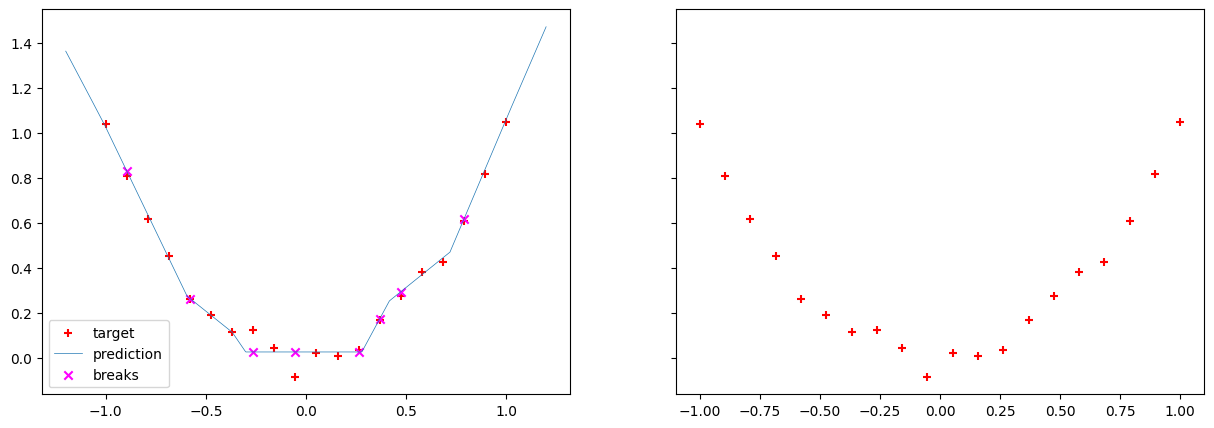

313/313 [==============================] - 1s 1ms/step - loss: 0.0014 - mean_squared_error: 0.0014


[0.0013557585189118981, 0.0013557585189118981]

In [42]:
X = np.linspace(-1, 1, 20)
y = X**2 + np.random.normal(0, 0.05, 20)
model20n, h20n = treeni_mudel(X, y, epochs=6000)

utils.joonista(model20n, X, y)
model20n.evaluate(X_valid, y_valid)

Epoch:   0 | Loss: 4.09642e-01
Epoch: 100 | Loss: 2.83466e-03
Epoch: 200 | Loss: 5.19453e-04
Epoch: 300 | Loss: 2.00863e-04
Epoch: 400 | Loss: 1.92461e-04
Epoch: 500 | Loss: 1.96366e-04
Epoch: 600 | Loss: 2.42249e-04
Epoch: 700 | Loss: 2.21791e-04
Epoch: 800 | Loss: 1.79963e-04
Epoch: 900 | Loss: 1.93309e-04
Epoch: 1000 | Loss: 2.51802e-04
Epoch: 1100 | Loss: 2.14197e-04
Epoch: 1200 | Loss: 1.83778e-04
Epoch: 1300 | Loss: 1.88910e-04
Epoch: 1400 | Loss: 1.93337e-04
Epoch: 1500 | Loss: 2.33829e-04
Epoch: 1600 | Loss: 2.03411e-04
Epoch: 1700 | Loss: 1.92529e-04
Epoch: 1800 | Loss: 1.99160e-04
Epoch: 1900 | Loss: 1.97861e-04
Epoch: 2000 | Loss: 2.14744e-04
Epoch: 2100 | Loss: 2.11089e-04
Epoch: 2200 | Loss: 1.90664e-04
Epoch: 2300 | Loss: 2.47218e-04
Epoch: 2400 | Loss: 1.89826e-04
Epoch: 2500 | Loss: 2.11927e-04
Epoch: 2600 | Loss: 2.12911e-04
Epoch: 2700 | Loss: 2.14717e-04
Epoch: 2800 | Loss: 2.49095e-04
Epoch: 2900 | Loss: 1.89005e-04
Epoch: 3000 | Loss: 1.98714e-04
Epoch: 3100 | Loss

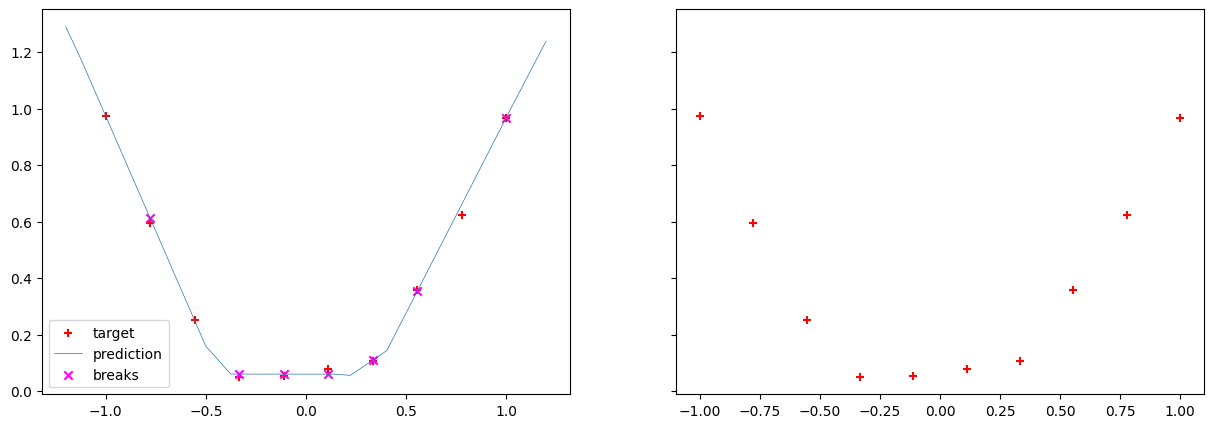

313/313 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018


[0.00183223991189152, 0.00183223991189152]

In [43]:
X = np.linspace(-1, 1, 10)
y = X**2 + np.random.normal(0, 0.05, 10)
model10n, h10n = treeni_mudel(X, y, epochs=6000)

utils.joonista(model10n, X, y)
model10n.evaluate(X_valid, y_valid)

1/1 [==============================] - 0s 60ms/step
model contains 7 breaks
32/32 [==============================] - 0s 1ms/step


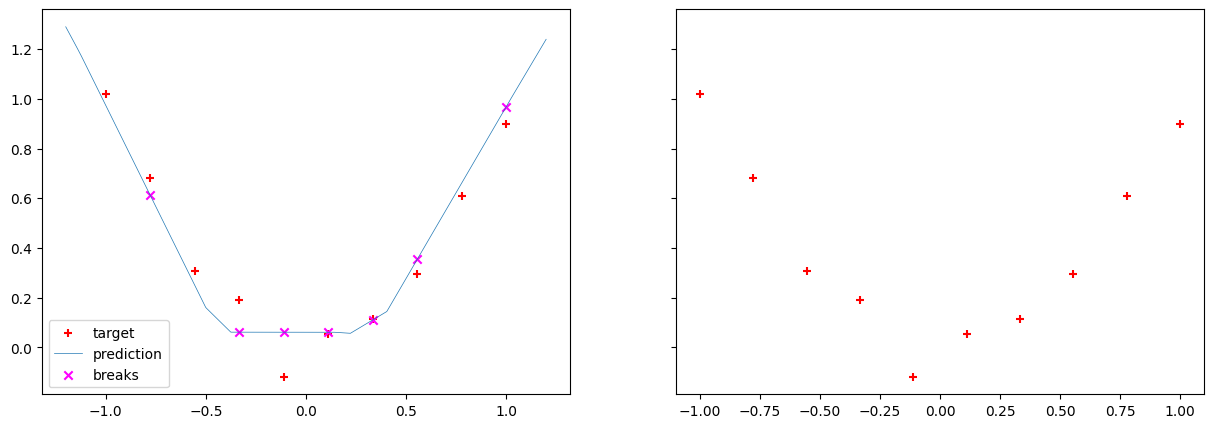

In [44]:
X = np.linspace(-1, 1, 10)
y = X**2 + np.random.normal(0, 0.05, 10)

utils.joonista(model10n, X, y, max_delta=0.00000000001)

## less noisi data @0.01

Epoch:   0 | Loss: 1.81763e-01
Epoch: 100 | Loss: 7.80189e-04
Epoch: 200 | Loss: 4.49076e-04
Epoch: 300 | Loss: 3.62085e-04
Epoch: 400 | Loss: 2.44627e-04
Epoch: 500 | Loss: 1.85928e-04
Epoch: 600 | Loss: 1.56700e-04
Epoch: 700 | Loss: 1.53191e-04
Epoch: 800 | Loss: 1.72355e-04
Epoch: 900 | Loss: 1.75917e-04
Epoch: 1000 | Loss: 1.48798e-04
Epoch: 1100 | Loss: 1.58984e-04
Epoch: 1200 | Loss: 1.37259e-04
Epoch: 1300 | Loss: 1.33172e-04
Epoch: 1400 | Loss: 1.51771e-04
Epoch: 1500 | Loss: 1.39377e-04
Epoch: 1600 | Loss: 1.31459e-04
Epoch: 1700 | Loss: 1.36482e-04
Epoch: 1800 | Loss: 1.30136e-04
Epoch: 1900 | Loss: 1.40918e-04
Epoch: 2000 | Loss: 1.28834e-04
Epoch: 2100 | Loss: 1.27029e-04
Epoch: 2200 | Loss: 1.19294e-04
Epoch: 2300 | Loss: 1.28054e-04
Epoch: 2400 | Loss: 1.23894e-04
Epoch: 2500 | Loss: 1.15972e-04
Epoch: 2600 | Loss: 1.24076e-04
Epoch: 2700 | Loss: 1.19268e-04
Epoch: 2800 | Loss: 1.15043e-04
Epoch: 2900 | Loss: 1.34599e-04
Epoch: 3000 | Loss: 1.17813e-04
Epoch: 3100 | Loss

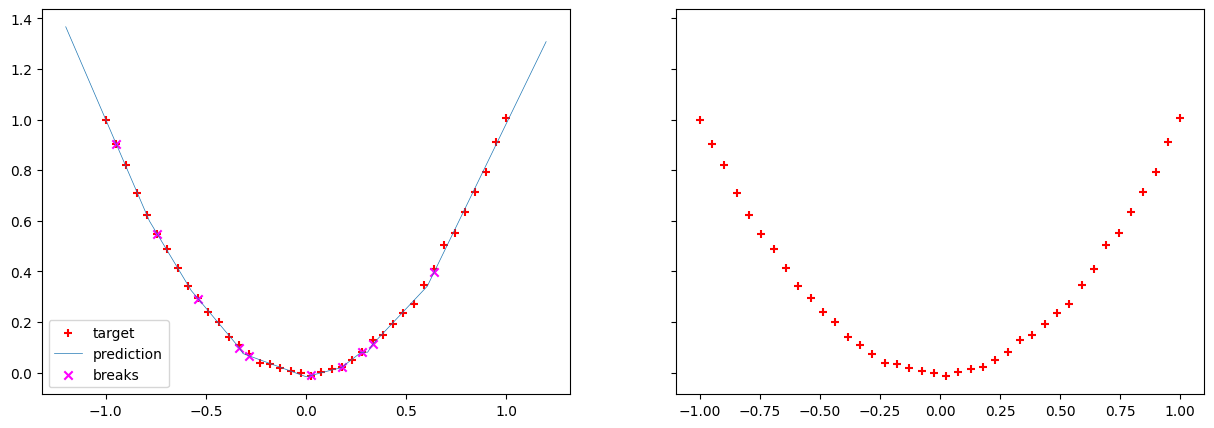

313/313 [==============================] - 0s 1ms/step - loss: 7.3775e-05 - mean_squared_error: 7.3775e-05


[7.377457950497046e-05, 7.377457950497046e-05]

In [45]:
X = np.linspace(-1, 1, 40)
y = X**2 + np.random.normal(0, 0.01, 40)
model40n2, h40n2 = treeni_mudel(X, y, epochs=6000)

utils.joonista(model40n2, X, y)
model40n2.evaluate(X_valid, y_valid)

Epoch:   0 | Loss: 5.88381e-01
Epoch: 100 | Loss: 1.36654e-02
Epoch: 200 | Loss: 1.54049e-03
Epoch: 300 | Loss: 1.24591e-03
Epoch: 400 | Loss: 1.20172e-03
Epoch: 500 | Loss: 1.21072e-03
Epoch: 600 | Loss: 9.92749e-04
Epoch: 700 | Loss: 9.99926e-04
Epoch: 800 | Loss: 8.74336e-04
Epoch: 900 | Loss: 9.92319e-04
Epoch: 1000 | Loss: 9.24210e-04
Epoch: 1100 | Loss: 8.57053e-04
Epoch: 1200 | Loss: 1.04063e-03
Epoch: 1300 | Loss: 8.78727e-04
Epoch: 1400 | Loss: 8.74812e-04
Epoch: 1500 | Loss: 9.22825e-04
Epoch: 1600 | Loss: 9.62001e-04
Epoch: 1700 | Loss: 1.18678e-03
Epoch: 1800 | Loss: 8.81480e-04
Epoch: 1900 | Loss: 9.62326e-04
Epoch: 2000 | Loss: 9.73644e-04
Epoch: 2100 | Loss: 1.00038e-03
Epoch: 2200 | Loss: 8.66502e-04
Epoch: 2300 | Loss: 1.37832e-03
Epoch: 2400 | Loss: 1.04168e-03
Epoch: 2500 | Loss: 1.14178e-03
Epoch: 2600 | Loss: 1.12608e-03
Epoch: 2700 | Loss: 8.71630e-04
Epoch: 2800 | Loss: 9.68659e-04
Epoch: 2900 | Loss: 9.61383e-04
Epoch: 3000 | Loss: 9.90459e-04
Epoch: 3100 | Loss

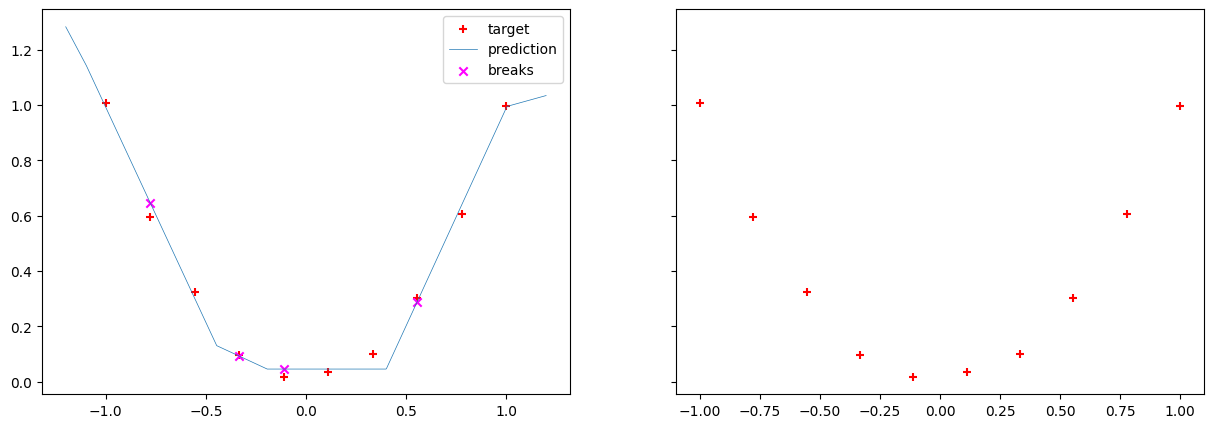

313/313 [==============================] - 0s 1ms/step - loss: 0.0015 - mean_squared_error: 0.0015


[0.0014622451271861792, 0.0014622451271861792]

In [46]:
X = np.linspace(-1, 1, 10)
y = X**2 + np.random.normal(0, 0.01, 10)
model10n2, h10n2 = treeni_mudel(X, y, epochs=6000)

utils.joonista(model10n2, X, y)
model10n2.evaluate(X_valid, y_valid)